Required packets

In [50]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import yeojohnson

## Prepare the dataset

Load the dataset and retrieve header and time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Dataset does not contain NaN values


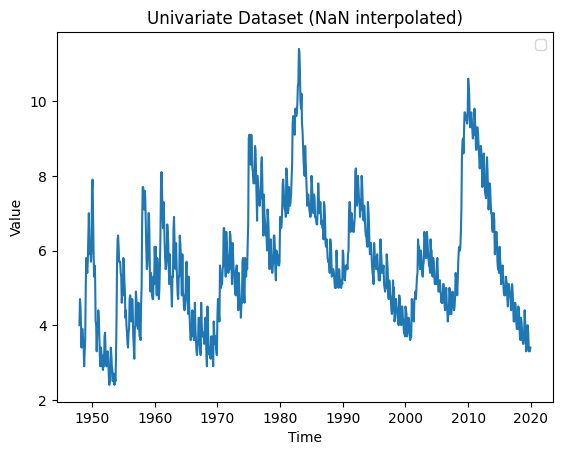

In [51]:
#date_parser = lambda x: to_datetime(x, format="%d/%m/%Y")
series = pd.read_csv('../dataset/monthly/unemployment-rate.csv', header=0, index_col=0, parse_dates=True)


series.replace('.', np.nan, inplace=True)

# Check for NaN values
nan_check = series.isna().any().any()

if nan_check:
    print("Dataset contains NaN values")
    upsampled= series.resample('D').mean()
    series = upsampled.interpolate(method = 'linear')
else:
    print("Dataset does not contain NaN values")

# Retrieve the header (column names) from the original DataFrame
header = series.columns.tolist()
#print(header)

# Create a time index for the entire period
time_index = series.index

X = series.values

plt.plot(time_index, X)

plt.title("Univariate Dataset (NaN interpolated)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

Remove the change in variance and the trend. 

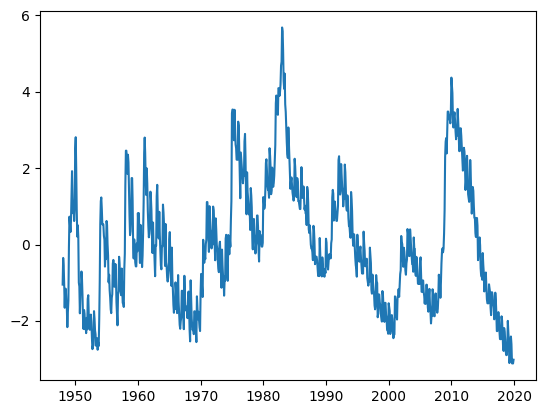

In [52]:
# To remove change in veriance
xt, lmbda = yeojohnson(X)
# To remove trend
model = LinearRegression()
y = np.array([x for x in range(0, len(X))])
model.fit(y.reshape(-1, 1), X)
pred = model.predict(y.reshape(-1, 1))
detrend = X - pred
# Plot
plt.plot(time_index, detrend)
plt.show()

Scale the time series, need to obtain the base configuration

In [53]:
scaler = MinMaxScaler(feature_range=(-1, 1)) # Scale the values between -1 and 1
#time_series_scaled = scaler.fit_transform(detrended.values.reshape(-1, 1))
time_series_scaled = scaler.fit_transform(detrend.reshape(-1, 1))

Create the new dataset

In [54]:
df = DataFrame(data = time_series_scaled, index = time_index, columns = header) #header
df.to_csv('series_normalized.csv')

Plot

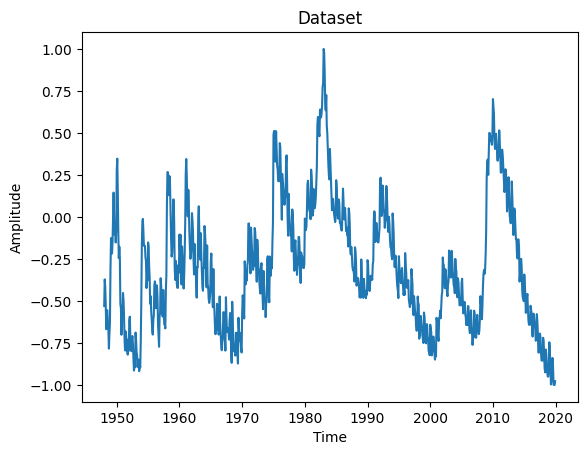

In [55]:
plt.plot(time_index, time_series_scaled)
plt.title('Dataset')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [56]:
time_series_scaled = time_series_scaled.flatten()
top_10_values = np.sort(time_series_scaled)[-20:]
last_10_values = np.sort(time_series_scaled)[:20]
best = max(top_10_values)
worst = min(last_10_values)

median = np.median(np.sort(time_series_scaled))
best_height = np.mean(top_10_values)
worst_height = np.mean(last_10_values)
test = best_height + np.abs(worst_height)
print("Best height: ", best_height)
print("Worst height: ", worst_height)
print("Best value: ", best)
print("Worst value: ", worst)
print("Median value: ", median)
print("Test: ", test)


Best height:  0.6911314746155325
Worst height:  -0.9343580732175436
Best value:  1.0
Worst value:  -1.0
Median value:  -0.33857502234204706
Test:  1.6254895478330762
